In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df = pd.read_excel("Covid'19.xlsx")
df

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,TotÂ Cases//1M pop,TotÂ Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÃ‚Â,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [3]:
#checking the null values
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
TotÂ Cases//1M pop         0
TotÂ Deaths/1M pop         0
Death percentage           0
dtype: int64

# QUESTION 1: What is the total number of COVID-19 cases and deaths globally?

In [4]:
# using sum function
print("The total number of cases is", df['Total Cases'].sum())
print("The total number of death is", df['Total Deaths'].sum())

The total number of cases is 491575827
The total number of death is 6175829


Discussion: Considering the total case and total death, we can see a massive significant difference in the total number of cases and the total number of the deaseased incur. we can see that the total number of death was minimum and not up to 50% of the total cases

# QUESTION 2: Which countries had the highest number of total cases and deaths?

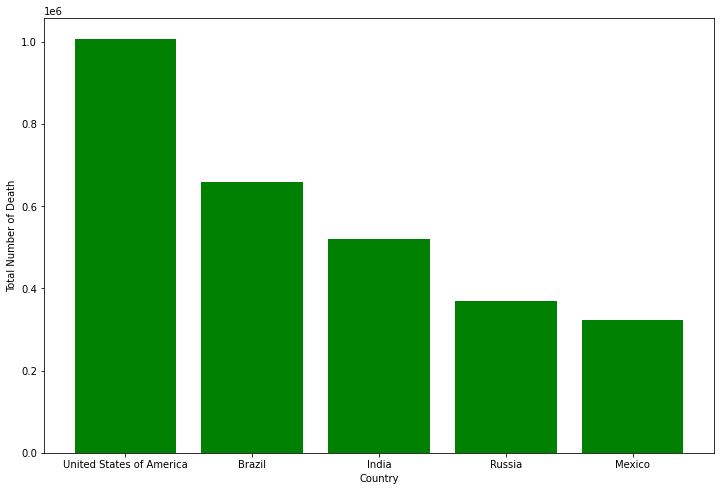

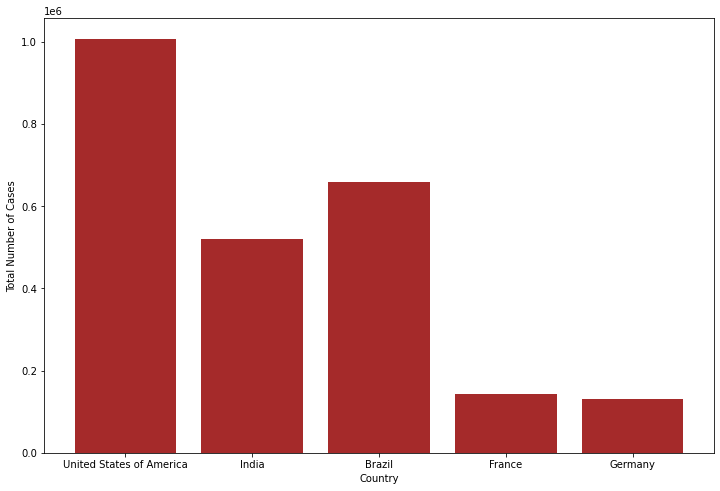

In [5]:
#plotting Total Death against Country
plt.figure(figsize=(12,8))
top_5 = df.sort_values(by='Total Deaths', ascending=False).head(5)
plt.bar(top_5['Country'],top_5['Total Deaths'], color= 'green')
plt.ylabel('Total Number of Death')
plt.xlabel('Country')
plt.show()

#Plotting Total Cases By Country
plt.figure(figsize=(12,8))
total_cases = df.sort_values(by='Total Cases', ascending=False).head(5)
plt.bar(total_cases['Country'],total_cases['Total Deaths'], color= 'brown')
plt.ylabel('Total Number of Cases',)
plt.xlabel('Country')
plt.show()


Discussion: looking at the figues above, we can see that United States of America has the highest toatal cases of covid and as well the highest total number of death due to this pandemic.

# QUESTION 3: Which continent had the highest and lowest death percentage?

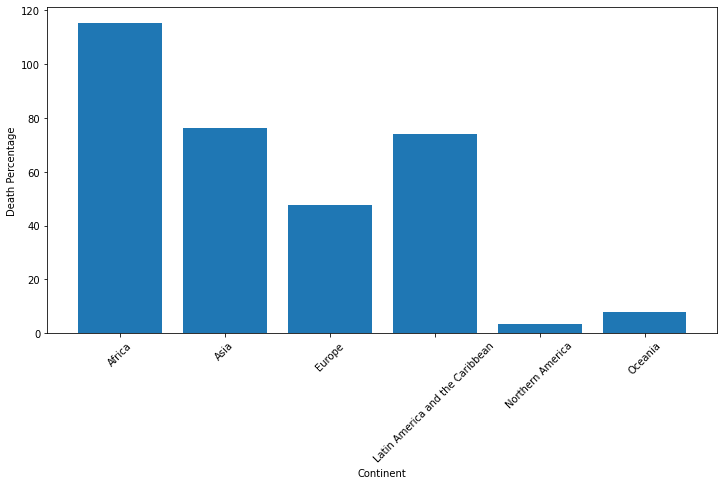

In [6]:
#Plotting  continent by the death percentage 
plt.figure(figsize=(12,6))
df.groupby('Continent')['Death percentage'].sum()
plt.bar(df.groupby('Continent')['Death percentage'].sum().index,df.groupby('Continent')['Death percentage'].sum())
plt.xticks(rotation=45)
plt.ylabel('Death Percentage')
plt.xlabel('Continent')
plt.show()

Discussion: The analysis above shows that Africa has the highest death percentage and Oceania has the lowest death percentage

# QUESTION 4: What is the average death percentage across countries?

In [7]:
means = df.groupby('Country')['Death percentage'].sum().agg('mean')
print('The average death percentage across countries is ', means)

The average death percentage across countries is  1.4441248952577774


Discussion: The average death percentage across all country is about 1.44%. Which means atleast every county has about 1.445 death percentage 

# QUESTION 5: Is there a correlation between the population size and the total number of cases or deaths in a country?

In [8]:
df.corr()

,Population,Total Cases,Total Deaths,TotÂ Cases//1M pop,TotÂ Deaths/1M pop,Death percentage
Population,1.000000,0.430687,0.428189,-0.130130,-0.066485,0.083387
Total Cases,0.430687,1.000000,0.915263,0.127890,0.216272,-0.032520
Total Deaths,0.428189,0.915263,1.000000,0.036561,0.289201,0.082616
TotÂ Cases//1M pop,-0.130130,0.127890,0.036561,1.000000,0.508630,-0.349986
TotÂ Deaths/1M pop,-0.066485,0.216272,0.289201,0.508630,1.000000,0.061088
Death percentage,0.083387,-0.032520,0.082616,-0.349986,0.061088,1.000000


Discussion: Rule for decision: the closer the value to positive 1, the stronger the positive correlation and the closer the value to negative 1, the stronger the negative correlation. since, the correlation value between population size to Total Cases and total death is 0.43 and 0.428 respectively. this shows that they have a significant correlations, which means if there is an increase in the population size, there would be quite amount of increase in the total cases and total death.

# QUESTION 6: Which countries managed to keep their death percentage low despite a high number of cases?

In [9]:
low_percent = df.sort_values(by = 'Total Cases', ascending=False).head()
low_percent.groupby('Country')['Death percentage', 'Total Cases'].sum()

,Death percentage,Total Cases
Country,,
Brazil,2.200910,29999816
France,0.548145,25997852
Germany,0.603163,21646375
India,1.211712,43029044
United States of America,1.231957,81839052


Discussion: The analysis above shows the five countries with the highest total cases but with lower death percentage.United States of America hass the higest total number of cases and manage to have one of the lowest death percentage among all the countries.

# QUESTION 7: Based on the death percentage, which countries should be considered for further analysis regarding their healthcare response?

In [10]:
df.nlargest(5, 'Death percentage')[['Country', 'Population','Total Cases','Death percentage']]

,Country,Population,Total Cases,Death percentage
222,Yemen,30975258,11806,18.151787
221,Western Sahara,623031,10,10.000000
193,Sudan,45640385,61955,7.920265
158,Peru,33775745,3548559,5.983499
130,Mexico,131303955,5665376,5.705041


Discusion: Considering the above analysis, we can see that Yemen has the total population size of approximately 30.98millions, total cases of the virus was 11.8 thousands cases and have 18.2% of death, conparing this to some other countries with bigger total cases but manage to have lower death rate. it is safe to say that Yemen need to increase heathcare response in the country.